In [48]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [57]:
from matplotlib import rc
rc('font',**{'family':'serif', 'size': 22})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [49]:
cwd = os.getcwd()
def get_data(data_dir):
    Cross_Loss = np.load(cwd+'\\'+data_dir+'\\CrosslossHold.npy')
    Prob = np.load(cwd+'\\'+data_dir+'\\ProbHold.npy')
    Score = np.load(cwd+'\\'+data_dir+'\\ScoreHold.npy')
    Timestep = np.load(cwd+'\\'+data_dir+'\\TimestepHold.npy')
    return Cross_Loss, Prob, Score, Timestep

# Rough action detector, 0.1 mixing param

In [96]:
data_dir = "TransferExperiment0001"
loss, prob, score, time = get_data(data_dir)

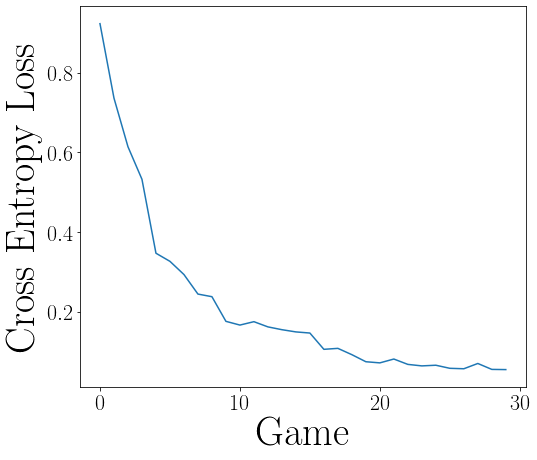

In [95]:
plt.figure(figsize=(8,7))
plt.plot(loss)
#plt.title('Average Batch Loss Per Game')
plt.xlabel('Game',size=40)
plt.ylabel('Cross Entropy Loss',size=40)
plt.savefig(cwd+'\\'+data_dir+'\\Loss_edit',dpi=500,bbox_inches='tight')

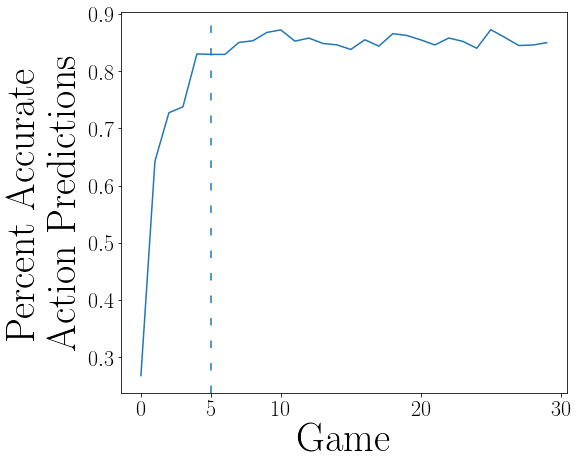

In [94]:
plt.figure(figsize=(8,7))
plt.plot(prob)
#plt.title('Percent Accurate Action Predictions Per Game')
plt.axvline(5,ls='--',dashes=(5, 10))
plt.xticks([0,5,10,20,30])
plt.xlabel('Game',size=40)
plt.ylabel('Percent Accurate \n Action Predictions',size=40)
plt.savefig(cwd+'\\'+data_dir+'\\Pred_edit',dpi=500,bbox_inches='tight')

In [23]:
score_mean = np.mean(score)
score_std = np.std(score)
print("{} pm {} Average score over {} games".format(round(score_mean,2),round(score_std,2),len(score)))

2.3 pm 1.88 Average score over 30 games


In [24]:
time_mean = np.mean(time)
time_std = np.std(time)
print("{} pm {} Average score over {} games".format(round(time_mean,2),round(time_std,2),len(time)))

19364.0 pm 2527.59 Average score over 30 games


<Figure size 576x504 with 0 Axes>

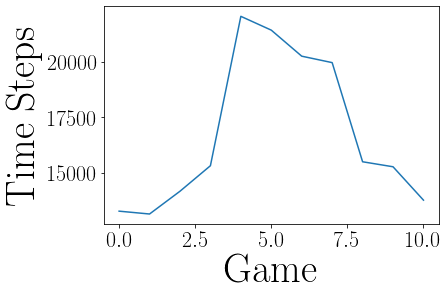

In [100]:
plt.figure(figsize=(8,7))
time_fig = plt.figure('Time')
plt.plot(time[0:11])
plt.xlabel('Game',size=40)
plt.ylabel('Time Steps',size=40)
time_fig.savefig(cwd+'\\'+data_dir+'\\Time_Zoom',bbox_inches='tight')

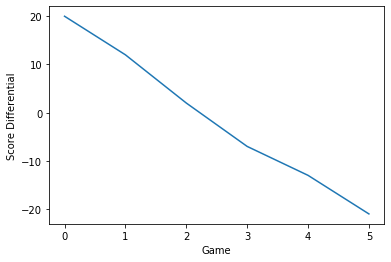

In [43]:
score_fig = plt.figure('Score')
plt.plot(score[0:6])
plt.xlabel('Game')
plt.ylabel('Score Differential')
score_fig.savefig(cwd+'\\'+data_dir+'\\Score_Zoom')

In [2]:
from model import Policy

In [101]:
import gym

In [102]:
obs = env.reset()

In [123]:
obs, _, _, _ = env.step(0)

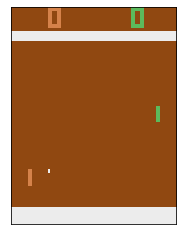

In [124]:
plt.imshow(obs)
plt.xticks([])
plt.yticks([])
plt.savefig('GameFrame',bbox_inches='tight')

In [113]:
from model import Policy

In [114]:
policy = Policy()

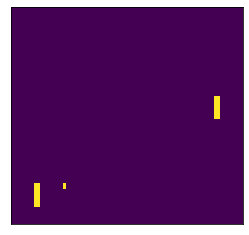

In [125]:
plt.imshow(policy.state_to_tensor(obs).view(75,80))
plt.xticks([])
plt.yticks([])
plt.savefig('GameFrameProcess',bbox_inches='tight')

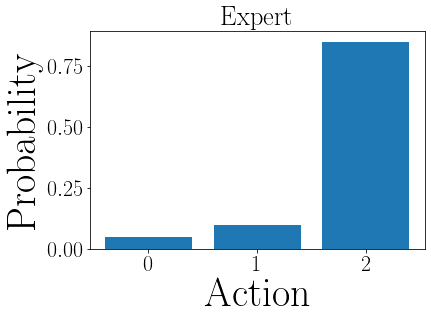

In [131]:
x = [0,1,2]
y = [0.05,0.10,0.85]
plt.title('Expert')
plt.xlabel('Action',size=40)
plt.ylabel('Probability',size=40)
plt.bar(x,y)
plt.savefig('ExpertActions',dpi=500,bbox_inches='tight')

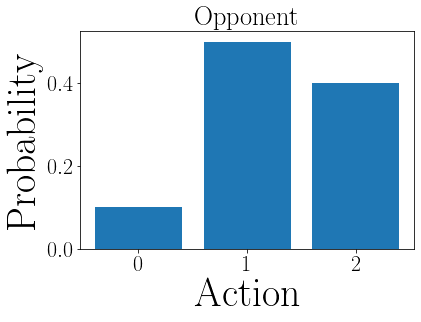

In [132]:
x = [0,1,2]
y = [0.10,0.50,0.40]
plt.title('Opponent')
plt.xlabel('Action',size=40)
plt.ylabel('Probability',size=40)
plt.bar(x,y)
plt.savefig('OpponentActions',dpi=500,bbox_inches='tight')

In [134]:
from utils import *

In [143]:
op_init = np.load("C:\\Users\\Simas\\Desktop\\Insight\\Insight-Project\\Project\\tests\\Opponent Down - Initial.npy")

In [144]:
op_final = np.load("C:\\Users\\Simas\\Desktop\\Insight\\Insight-Project\\Project\\tests\\Opponent Down - Final.npy")

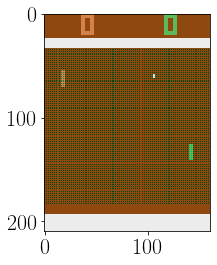

In [145]:
plt.imshow(op_init)

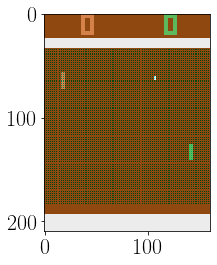

In [146]:
plt.imshow(op_final)

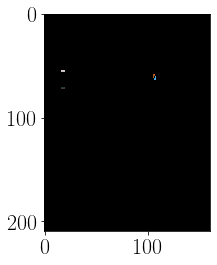

In [147]:
plt.imshow(op_final-op_init)

In [188]:
get_opponent_action(op_final,op_init)

2

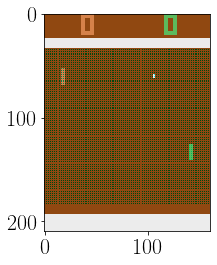

In [179]:
plt.imshow(temp)

In [177]:
temp = np.array(op_init)
temp[53:69,16:20] = np.array(np.array(op_init[55:71,16:20]))
temp[69:71, 16:20] = np.array(np.array(op_init[69:71,20:24]))

In [182]:
np.save("Opponent Up", temp)

In [185]:
print(cwd)

C:\Users\Simas\Desktop\Insight\Insight-Project\PPO\AdaptiveImitation


In [195]:
len(list(policy.parameters())[2])

3